## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [14]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
df = s_data
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

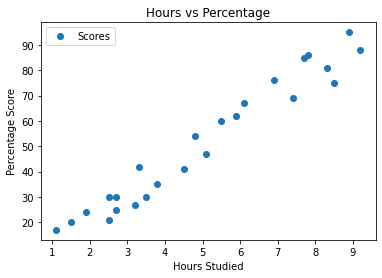

In [3]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

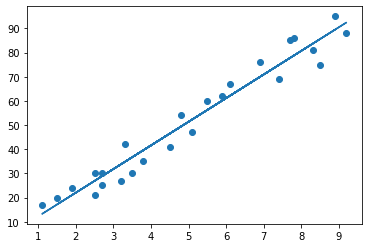

In [5]:
from scipy import stats                                    
l = df.Hours                                                #This is a single variable linear regression and as seen from the plot one can see that this model is not that accurate
m = df.Scores
slope, intercept, r, p, std_err = stats.linregress(l, m)
def myfunc(l):
  return slope * l + intercept

mymodel = list(map(myfunc, l))
plt.scatter(l,m)
plt.plot(l, mymodel)
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [7]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [20]:
#Split dataset into training set and test sets
#Use scikit-learn’s train_test_split() method to split x into 80% training set and 20%.

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=42) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [19]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


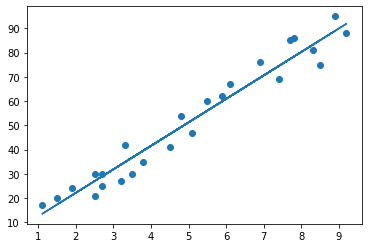

In [10]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [11]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [15]:
# Comparing Actual vs Predicted
dff = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
dff 

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [24]:
model.fit(X_train, y_train)
print('Train score:')
model.score(X_train,y_train)


Train score:


0.9491209376364416

In [25]:
print('Test score:')
model.score(X_test,y_test)

Test score:


0.9678055545167994

In [27]:
# predict y-values from x_test
y_predict = model.predict(X_test)

In [29]:
#Testing our model
abhay_study = [[9.5]]
a = model.predict(abhay_study)
print(a)

[94.80663482]


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.


An error term appears in a statistical model, like a regression model, to indicate the uncertainty in the model. The error term is a residual variable that accounts for a lack of perfect goodness of fit.


In [30]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 3.9207511902099244


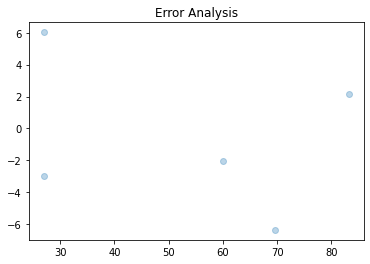

In [31]:
error = y_predict - y_test                             
plt.scatter(y_predict, error, alpha=0.3)
plt.title('Error Analysis')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


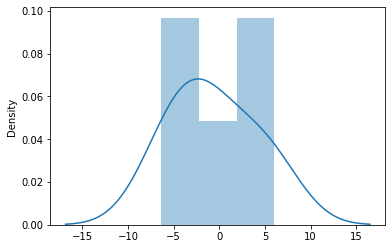

In [32]:
import seaborn as sns
sns.distplot(error)

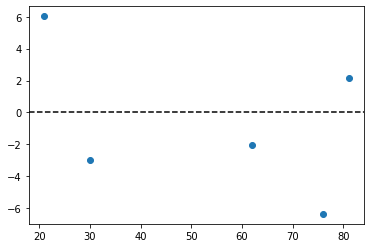

In [33]:
plt.scatter(y_test, error)
plt.axhline(0, color = 'black', linestyle = '--')
plt.show()